# Audio, Textの特徴量の類似度と、スコアの相関を見てみる

In [14]:
from pathlib import Path
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mos_score = pd.read_csv("../../../data/MusicEval-phase1/sets/train_mos_list.txt", sep=",", header=None)
mos_score.columns = ["filename", "mi", "ta"]
mos_score.head()

,filename,mi,ta
0,audiomos2025-track1-S002_P044.wav,4.8,4.0
1,audiomos2025-track1-S030_P094.wav,2.2,2.0
2,audiomos2025-track1-S017_P082.wav,2.8,2.8
3,audiomos2025-track1-S023_P051.wav,2.2,2.6
4,audiomos2025-track1-S021_P019.wav,3.4,3.6


In [15]:
audio_dir = Path("../../../data/MusicEval-phase1/feat/audio/")
prompt_dir = Path("../../../data/MusicEval-phase1/feat/prompt/")

mi_list, ta_list, sim_list = [], [], []
for i, row in mos_score.iterrows():
    fn = row["filename"]
    audio_path = audio_dir / f"{Path(fn).stem}.pt"
    prompt_path = prompt_dir /f"{Path(fn).stem}.pt"
    assert audio_path.exists(), f"Audio file {audio_path} does not exist."
    assert prompt_path.exists(), f"Prompt file {prompt_path} does not exist."
    
    audio_emb = torch.load(audio_path).unsqueeze(0)
    prompt_emb = torch.load(prompt_path).unsqueeze(0)
    sim = torch.cosine_similarity(audio_emb, prompt_emb)
    sim = sim.item()
    mi_list.append(row["mi"])
    ta_list.append(row["ta"])
    sim_list.append(sim)
    

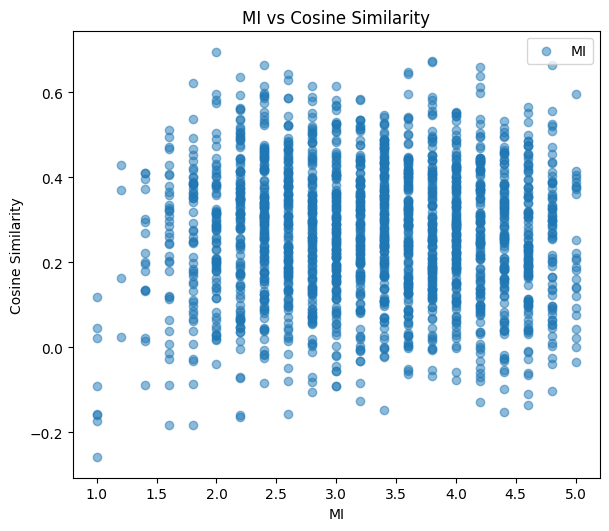

In [18]:
plt.figure(figsize=(6, 5))
plt.scatter(mi_list, sim_list, label="MI", alpha=0.5)
plt.tight_layout()
plt.xlabel("MI")
plt.ylabel("Cosine Similarity")
plt.title("MI vs Cosine Similarity")
plt.legend()
plt.show()

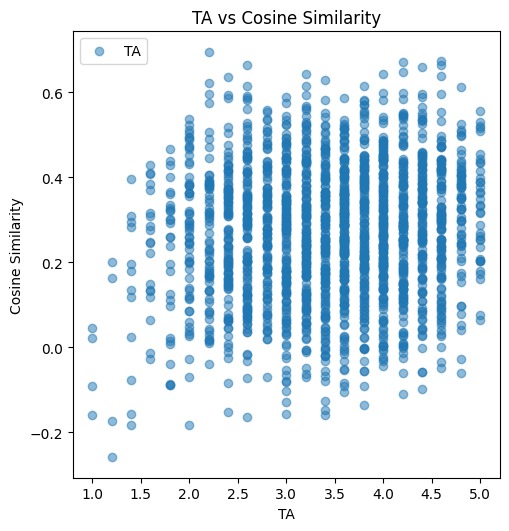

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(ta_list, sim_list, label="TA", alpha=0.5)
plt.tight_layout()
plt.xlabel("TA")
plt.ylabel("Cosine Similarity")
plt.title("TA vs Cosine Similarity")
plt.legend()
plt.show()